<a href="https://colab.research.google.com/github/KorrawanOu/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

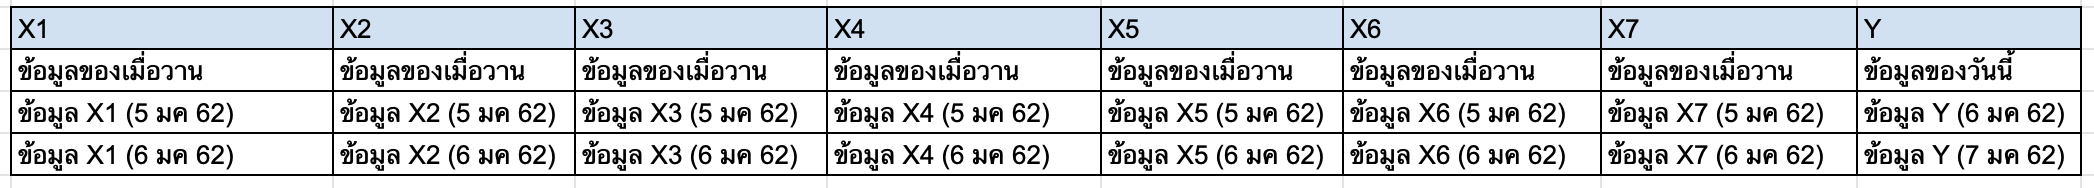

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/BSC_DRDM23/อุตุ'

Mounted at /content/drive


#จังหวัดขอนแก่น

In [3]:
# นำข้อมูลเข้า จ.ขอนแก่น
PS_kk = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header=4) #ความกดอากาศ
RH_kk = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header=4) #ความชื้นสัมพันธ์
WS_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header=4) #ความเร็วลม
CD_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header=4) #จำนวนเมฆ
R_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header=4) #ปริมาณฝน
DPT_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header=4) #อุณหภูมิต่ำสุด


In [4]:
RH_kk.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


##เปลี่ยนชื่อ column,จัดการข้อมูล

In [5]:
PS_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [6]:
PS_KK = PS_kk.drop(['Unnamed: 34'], axis=1)

In [7]:
PS_KK['ปี'] = PS_KK['เดือน/ปี'].dt.year
PS_KK['เดือน'] = PS_KK['เดือน/ปี'].dt.month
PS_KK = PS_KK.drop(['เดือน/ปี'], axis=1)
PS_KK.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,ปี,เดือน
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,2012,2


In [8]:
PS_KK_1 = PS_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_KK_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_KK_1

,สถานี,id,ปี,เดือน,วัน,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


In [9]:
PS_KK_1['จังหวัด'] = len(PS_KK_1)*['ขอนแก่น']
PS_KK_1

,สถานี,id,ปี,เดือน,วัน,ความกดอากาศ(%),จังหวัด
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47,ขอนแก่น
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65,ขอนแก่น
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49,ขอนแก่น
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28,ขอนแก่น
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88,ขอนแก่น
...,...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37,ขอนแก่น
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04,ขอนแก่น
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37,ขอนแก่น
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98,ขอนแก่น


In [10]:
PS_KK_2 = PS_KK_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_KK_3 = PS_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_KK_3

,จังหวัด,index,ปี,เดือน,วัน,ความกดอากาศ(%)
0,ขอนแก่น,0,2011,10,1,1005.47
1,ขอนแก่น,1,2011,10,2,1006.65
2,ขอนแก่น,2,2011,10,3,1007.49
3,ขอนแก่น,3,2011,10,4,1008.28
4,ขอนแก่น,4,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,ขอนแก่น,1700,2022,2,27,1014.37
1701,ขอนแก่น,1701,2022,2,28,1013.04
1702,ขอนแก่น,1702,2022,2,29,1013.37
1703,ขอนแก่น,1703,2022,2,30,1013.98


In [11]:
PS_KK_3["id"] = ['kk'] + PS_KK_3["index"].astype(str)
PS_KK_3.drop(['index'],axis=1)

<ipython-input-11-9f156fcdf658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_KK_3["id"] = ['kk'] + PS_KK_3["index"].astype(str)


,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),id
0,ขอนแก่น,2011,10,1,1005.47,kk0
1,ขอนแก่น,2011,10,2,1006.65,kk1
2,ขอนแก่น,2011,10,3,1007.49,kk2
3,ขอนแก่น,2011,10,4,1008.28,kk3
4,ขอนแก่น,2011,10,5,1009.88,kk4
...,...,...,...,...,...,...
1700,ขอนแก่น,2022,2,27,1014.37,kk1700
1701,ขอนแก่น,2022,2,28,1013.04,kk1701
1702,ขอนแก่น,2022,2,29,1013.37,kk1702
1703,ขอนแก่น,2022,2,30,1013.98,kk1703


In [12]:
PS_KK_4 = PS_KK_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_KK_4

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,kk0,ขอนแก่น,2011,10,1,1005.47
1,kk1,ขอนแก่น,2011,10,2,1006.65
2,kk2,ขอนแก่น,2011,10,3,1007.49
3,kk3,ขอนแก่น,2011,10,4,1008.28
4,kk4,ขอนแก่น,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,1014.37
1701,kk1701,ขอนแก่น,2022,2,28,1013.04
1702,kk1702,ขอนแก่น,2022,2,29,1013.37
1703,kk1703,ขอนแก่น,2022,2,30,1013.98


In [13]:
RH_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [14]:
RH_KK = RH_kk.drop(['Unnamed: 34'], axis=1)
RH_KK['ปี'] = RH_KK['เดือน/ปี'].dt.year
RH_KK['เดือน'] = RH_KK['เดือน/ปี'].dt.month
RH_KK = RH_KK.drop(['เดือน/ปี'], axis=1)
RH_KK.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,ปี,เดือน
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,72,73,69,69,75,71,71,68,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,66,65,67,68,67,67,65,-,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,62,60,60,62,65,66,63,64,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,74,75,71,75,69,70,67,68,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,53,48,57,71,73,68,-,-,2012,2


In [15]:
RH_KK_1 = RH_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_KK_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_KK_1

RH_KK_1['จังหวัด'] = len(RH_KK_1)*['ขอนแก่น']
RH_KK_1

RH_KK_2 = RH_KK_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_KK_3 = RH_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_KK_3

RH_KK_3["id"] = ['kk'] + RH_KK_3["index"].astype(str)
RH_KK_3.drop(['index'],axis=1)

RH_KK_4 = RH_KK_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_KK_4

<ipython-input-15-5382cda3e5e6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_KK_3["id"] = ['kk'] + RH_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,kk0,ขอนแก่น,2011,10,1,83
1,kk1,ขอนแก่น,2011,10,2,92
2,kk2,ขอนแก่น,2011,10,3,86
3,kk3,ขอนแก่น,2011,10,4,80
4,kk4,ขอนแก่น,2011,10,5,86
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,58
1701,kk1701,ขอนแก่น,2022,2,28,62
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [16]:
WS_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [17]:
WS_KK = WS_kk.drop(['Unnamed: 34'], axis=1)
WS_KK['ปี'] = WS_KK['เดือน/ปี'].dt.year
WS_KK['เดือน'] = WS_KK['เดือน/ปี'].dt.month
WS_KK = WS_KK.drop(['เดือน/ปี'], axis=1)
WS_KK.head()

WS_KK_1 = WS_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_KK_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_KK_1

WS_KK_1['จังหวัด'] = len(WS_KK_1)*['ขอนแก่น']
WS_KK_1

WS_KK_2 = WS_KK_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_KK_3 = WS_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_KK_3

WS_KK_3["id"] = ['kk'] + WS_KK_3["index"].astype(str)
WS_KK_3.drop(['index'],axis=1)

WS_KK_4 = WS_KK_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_KK_4


<ipython-input-17-6c77c1de697b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_KK_3["id"] = ['kk'] + WS_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,kk0,ขอนแก่น,2011,10,1,3
1,kk1,ขอนแก่น,2011,10,2,2
2,kk2,ขอนแก่น,2011,10,3,3
3,kk3,ขอนแก่น,2011,10,4,2
4,kk4,ขอนแก่น,2011,10,5,2
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,2
1701,kk1701,ขอนแก่น,2022,2,28,2
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [18]:
CD_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_kk.head()

CD_KK = CD_kk.drop(['Unnamed: 34'], axis=1)
CD_KK['ปี'] = CD_KK['เดือน/ปี'].dt.year
CD_KK['เดือน'] = CD_KK['เดือน/ปี'].dt.month
CD_KK = CD_KK.drop(['เดือน/ปี'], axis=1)
CD_KK.head()

CD_KK_1 = CD_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_KK_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_KK_1

CD_KK_1['จังหวัด'] = len(CD_KK_1)*['ขอนแก่น']
CD_KK_1

CD_KK_2 = CD_KK_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_KK_3 = CD_KK_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_KK_3

CD_KK_3["id"] = ['kk'] + CD_KK_3["index"].astype(str)
CD_KK_3.drop(['index'],axis=1)

CD_KK_4 = CD_KK_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_KK_4

<ipython-input-18-788f7ad1aeaa>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_KK_3["id"] = ['kk'] + CD_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,kk0,ขอนแก่น,2011,10,1,9
1,kk1,ขอนแก่น,2011,10,2,10
2,kk2,ขอนแก่น,2011,10,3,10
3,kk3,ขอนแก่น,2011,10,4,8
4,kk4,ขอนแก่น,2011,10,5,10
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,2
1701,kk1701,ขอนแก่น,2022,2,28,2
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [19]:
R_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_kk.head()

R_KK = R_kk.drop(['Unnamed: 34'], axis=1)
R_KK['ปี'] = R_KK['เดือน/ปี'].dt.year
R_KK['เดือน'] = R_KK['เดือน/ปี'].dt.month
R_KK = R_KK.drop(['เดือน/ปี'], axis=1)
R_KK.head()

R_KK_1 = R_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_KK_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_KK_1

R_KK_1['จังหวัด'] = len(R_KK_1)*['ขอนแก่น']
R_KK_1

R_KK_2 = R_KK_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_KK_3 = R_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_KK_3

R_KK_3["id"] = ['kk'] + R_KK_3["index"].astype(str)
R_KK_3.drop(['index'],axis=1)

R_KK_4 = R_KK_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_KK_4

<ipython-input-19-25c01f2d27a2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_KK_3["id"] = ['kk'] + R_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,ขอนแก่น,2011,10,1,1.4
1,kk1,ขอนแก่น,2011,10,2,17.7
2,kk2,ขอนแก่น,2011,10,3,3
3,kk3,ขอนแก่น,2011,10,4,0
4,kk4,ขอนแก่น,2011,10,5,2.2
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,0
1701,kk1701,ขอนแก่น,2022,2,28,-
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [20]:
DPT_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_kk.head()

DPT_KK = DPT_kk.drop(['Unnamed: 34'], axis=1)
DPT_KK['ปี'] = DPT_KK['เดือน/ปี'].dt.year
DPT_KK['เดือน'] = DPT_KK['เดือน/ปี'].dt.month
DPT_KK = DPT_KK.drop(['เดือน/ปี'], axis=1)
DPT_KK.head()

DPT_KK_1 = DPT_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_KK_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_KK_1

DPT_KK_1['จังหวัด'] = len(DPT_KK_1)*['ขอนแก่น']
DPT_KK_1

DPT_KK_2 = DPT_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_KK_3 = DPT_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_KK_3

DPT_KK_3["id"] = ['kk'] + DPT_KK_3["index"].astype(str)
DPT_KK_3.drop(['index'],axis=1)

DPT_KK_4 = DPT_KK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_KK_4

<ipython-input-20-04991f60d18a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_KK_3["id"] = ['kk'] + DPT_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,24.2
1,kk1,ขอนแก่น,2011,10,2,24.0
2,kk2,ขอนแก่น,2011,10,3,22.9
3,kk3,ขอนแก่น,2011,10,4,21.9
4,kk4,ขอนแก่น,2011,10,5,21.7
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,15.7
1701,kk1701,ขอนแก่น,2022,2,28,17.5
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [102]:
BT_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_kk.head()

BT_KK = BT_kk.drop(['Unnamed: 34'], axis=1)
BT_KK['ปี'] = BT_KK['เดือน/ปี'].dt.year
BT_KK['เดือน'] = BT_KK['เดือน/ปี'].dt.month
BT_KK = BT_KK.drop(['เดือน/ปี'], axis=1)
BT_KK.head()

BT_KK_1 = BT_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_KK_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_KK_1

BT_KK_1['จังหวัด'] = len(BT_KK_1)*['ขอนแก่น']
BT_KK_1

BT_KK_2 = BT_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_KK_3 = BT_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_KK_3

BT_KK_3["id"] = ['kk'] + BT_KK_3["index"].astype(str)
BT_KK_3.drop(['index'],axis=1)

BT_KK_4 = BT_KK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_KK_4

<ipython-input-102-98ff1fd1450f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_KK_3["id"] = ['kk'] + BT_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,27.6
1,kk1,ขอนแก่น,2011,10,2,25.6
2,kk2,ขอนแก่น,2011,10,3,25.6
3,kk3,ขอนแก่น,2011,10,4,25.8
4,kk4,ขอนแก่น,2011,10,5,24.3
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,25.1
1701,kk1701,ขอนแก่น,2022,2,28,25.9
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [101]:
LW_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_kk.head()

LW_KK = LW_kk.drop(['Unnamed: 34'], axis=1)
LW_KK['ปี'] = LW_KK['เดือน/ปี'].dt.year
LW_KK['เดือน'] = LW_KK['เดือน/ปี'].dt.month
LW_KK = LW_KK.drop(['เดือน/ปี'], axis=1)
LW_KK.head()

LW_KK_1 = LW_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_KK_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_KK_1

LW_KK_1['จังหวัด'] = len(LW_KK_1)*['ขอนแก่น']
LW_KK_1

LW_KK_2 = LW_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
LW_KK_3 = LW_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_KK_3

LW_KK_3["id"] = ['kk'] + LW_KK_3["index"].astype(str)
LW_KK_3.drop(['index'],axis=1)

LW_KK_4 = LW_KK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_KK_4

<ipython-input-101-3a8c48be4f3e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_KK_3["id"] = ['kk'] + LW_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,24.8
1,kk1,ขอนแก่น,2011,10,2,23.0
2,kk2,ขอนแก่น,2011,10,3,22.1
3,kk3,ขอนแก่น,2011,10,4,22.8
4,kk4,ขอนแก่น,2011,10,5,23.1
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,18.2
1701,kk1701,ขอนแก่น,2022,2,28,-
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


##merge จังหวัดขอนแก่น

In [131]:
merged_KK = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_KK_4[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_KK_4[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            WS_KK_4[['id','ความเร็วลม(นอต)']], on='id'),
            CD_KK_4[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            R_KK_4[['id','ปริมาณน้ำฝน(มิลลิเมตร)']], on='id'),
            DPT_KK_4[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            BT_KK_4[['id','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='id'),
            LW_KK_4[['id','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='id')
merged_KK

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,kk1,ขอนแก่น,2011,10,2,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,kk2,ขอนแก่น,2011,10,3,1007.49,86,3,10,3,22.9,25.6,22.1
3,kk3,ขอนแก่น,2011,10,4,1008.28,80,2,8,0,21.9,25.8,22.8
4,kk4,ขอนแก่น,2011,10,5,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,1014.37,58,2,2,0,15.7,25.1,18.2
1701,kk1701,ขอนแก่น,2022,2,28,1013.04,62,2,2,-,17.5,25.9,-
1702,kk1702,ขอนแก่น,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,kk1703,ขอนแก่น,2022,2,30,1013.98,-,-,-,-,-,-,-


## จัดการค่า missing ด้วยค่า mean

In [175]:
khonkaen = merged_KK.replace({'-': np.NaN})
khonkaen

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.47,83.0,3.0,9.0,1.4,24.2,27.6,24.8
1,kk1,ขอนแก่น,2011,10,2,1006.65,92.0,2.0,10.0,17.7,24.0,25.6,23.0
2,kk2,ขอนแก่น,2011,10,3,1007.49,86.0,3.0,10.0,3,22.9,25.6,22.1
3,kk3,ขอนแก่น,2011,10,4,1008.28,80.0,2.0,8.0,0,21.9,25.8,22.8
4,kk4,ขอนแก่น,2011,10,5,1009.88,86.0,2.0,10.0,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,1014.37,58.0,2.0,2.0,0,15.7,25.1,18.2
1701,kk1701,ขอนแก่น,2022,2,28,1013.04,62.0,2.0,2.0,NaN,17.5,25.9,NaN
1702,kk1702,ขอนแก่น,2022,2,29,1013.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703,kk1703,ขอนแก่น,2022,2,30,1013.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
khonkaen.isnull().any() #ตรวจสอบ missing

id                               False
จังหวัด                          False
ปี                               False
เดือน                            False
วัน                              False
ความกดอากาศ(%)                    True
ความชื้นสัมพัทธ์(%)               True
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
ปริมาณน้ำฝน(มิลลิเมตร)            True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)      True
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)     True
อุณหภูมิต่ำสุด(เซลเซียส)          True
dtype: bool

In [177]:
khonkaen.dtypes #ตรวจสอบชนิดของแต่ละคอลัมน์

id                                object
จังหวัด                           object
ปี                                 int64
เดือน                              int64
วัน                                int64
ความกดอากาศ(%)                   float64
ความชื้นสัมพัทธ์(%)              float64
ความเร็วลม(นอต)                  float64
จำนวนเมฆ(10ส่วน)                 float64
ปริมาณน้ำฝน(มิลลิเมตร)            object
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     float64
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)    float64
อุณหภูมิต่ำสุด(เซลเซียส)         float64
dtype: object

In [179]:
khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce') #เปลี่ยน str เป็น float เพื่อให้หา meanได้

In [180]:
khonkaen.dtypes

id                                object
จังหวัด                           object
ปี                                 int64
เดือน                              int64
วัน                                int64
ความกดอากาศ(%)                   float64
ความชื้นสัมพัทธ์(%)              float64
ความเร็วลม(นอต)                  float64
จำนวนเมฆ(10ส่วน)                 float64
ปริมาณน้ำฝน(มิลลิเมตร)           float64
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     float64
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)    float64
อุณหภูมิต่ำสุด(เซลเซียส)         float64
dtype: object

In [159]:
mean_ps_kk = khonkaen['ความกดอากาศ(%)'].mean()
mean_ps_kk

1012.6146563060371

In [160]:
khonkaen['ความกดอากาศ(%)'] = khonkaen['ความกดอากาศ(%)'].fillna(mean_ps_kk)

In [161]:
khonkaen.isnull().any()

id                               False
จังหวัด                          False
ปี                               False
เดือน                            False
วัน                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)               True
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
ปริมาณน้ำฝน(มิลลิเมตร)            True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)      True
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)     True
อุณหภูมิต่ำสุด(เซลเซียส)          True
dtype: bool

In [182]:
mean_rh_kk = khonkaen['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_kk = khonkaen['ความเร็วลม(นอต)'].mean()
mean_cd_kk = khonkaen['จำนวนเมฆ(10ส่วน)'].mean()
mean_r_kk = khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'].mean()
mean_dpt_kk = khonkaen['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_kk = khonkaen['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_lw_kk = khonkaen['อุณหภูมิต่ำสุด(เซลเซียส)'].mean()

In [183]:
khonkaen['ความชื้นสัมพัทธ์(%)'] = khonkaen['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_kk)
khonkaen['ความเร็วลม(นอต)'] = khonkaen['ความเร็วลม(นอต)'].fillna(mean_ws_kk)
khonkaen['จำนวนเมฆ(10ส่วน)'] = khonkaen['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_kk)
khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'] = khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(mean_r_kk)
khonkaen['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = khonkaen['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_kk)
khonkaen['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = khonkaen['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_kk)
khonkaen['อุณหภูมิต่ำสุด(เซลเซียส)'] = khonkaen['อุณหภูมิต่ำสุด(เซลเซียส)'].fillna(mean_lw_kk)

In [184]:
khonkaen

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.47,83.000000,3.000000,9.000000,1.400000,24.200000,27.600000,24.800000
1,kk1,ขอนแก่น,2011,10,2,1006.65,92.000000,2.000000,10.000000,17.700000,24.000000,25.600000,23.000000
2,kk2,ขอนแก่น,2011,10,3,1007.49,86.000000,3.000000,10.000000,3.000000,22.900000,25.600000,22.100000
3,kk3,ขอนแก่น,2011,10,4,1008.28,80.000000,2.000000,8.000000,0.000000,21.900000,25.800000,22.800000
4,kk4,ขอนแก่น,2011,10,5,1009.88,86.000000,2.000000,10.000000,2.200000,21.700000,24.300000,23.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,1014.37,58.000000,2.000000,2.000000,0.000000,15.700000,25.100000,18.200000
1701,kk1701,ขอนแก่น,2022,2,28,1013.04,62.000000,2.000000,2.000000,1.815934,17.500000,25.900000,20.430345
1702,kk1702,ขอนแก่น,2022,2,29,1013.37,66.821514,3.204423,3.345487,1.815934,18.256971,25.447837,20.430345
1703,kk1703,ขอนแก่น,2022,2,30,1013.98,66.821514,3.204423,3.345487,1.815934,18.256971,25.447837,20.430345


#จังหวัดนครพนม

In [189]:
# นำข้อมูลเข้า จ.นครพนม
PS_np = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header=4) #ความกดอากาศ
RH_np = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header=4) #ความชื้นสัมพันธ์
WS_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header=4) #ความเร็วลม
CD_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header=4) #จำนวนเมฆ
R_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header=4) #ปริมาณฝน
DPT_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header=4) #อุณหภูมิต่ำสุด

##เปลี่ยนชื่อ column,จัดการข้อมูล

In [190]:
PS_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_np.head()

PS_NP = PS_np.drop(['Unnamed: 34'], axis=1)
PS_NP['ปี'] = PS_NP['เดือน/ปี'].dt.year
PS_NP['เดือน'] = PS_NP['เดือน/ปี'].dt.month
PS_NP = PS_NP.drop(['เดือน/ปี'], axis=1)
PS_NP.head()

PS_NP_1 = PS_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_NP_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_NP_1

PS_NP_1['จังหวัด'] = len(PS_NP_1)*['นครพนม']
PS_NP_1

PS_NP_2 = PS_NP_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_NP_3 = PS_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NP_3

PS_NP_3["id"] = ['np'] + PS_NP_3["index"].astype(str)
PS_NP_3.drop(['index'],axis=1)

PS_NP_4 = PS_NP_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NP_4

<ipython-input-190-2c5c679ee6dc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_NP_3["id"] = ['np'] + PS_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,np0,นครพนม,2011,10,1,1006.3
1,np1,นครพนม,2011,10,2,1007.38
2,np2,นครพนม,2011,10,3,1008.07
3,np3,นครพนม,2011,10,4,1008.44
4,np4,นครพนม,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,1016.43
1701,np1701,นครพนม,2022,2,28,1013.53
1702,np1702,นครพนม,2022,2,29,1013.37
1703,np1703,นครพนม,2022,2,30,1013.98


In [191]:
RH_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_np.head()

RH_NP = RH_np.drop(['Unnamed: 34'], axis=1)
RH_NP['ปี'] = RH_NP['เดือน/ปี'].dt.year
RH_NP['เดือน'] = RH_NP['เดือน/ปี'].dt.month
RH_NP = RH_NP.drop(['เดือน/ปี'], axis=1)
RH_NP.head()

RH_NP_1 = RH_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_NP_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_NP_1

RH_NP_1['จังหวัด'] = len(RH_NP_1)*['นครพนม']
RH_NP_1

RH_NP_2 = RH_NP_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_NP_3 = RH_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NP_3

RH_NP_3["id"] = ['np'] + RH_NP_3["index"].astype(str)
RH_NP_3.drop(['index'],axis=1)

RH_NP_4 = RH_NP_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NP_4

<ipython-input-191-020b77968b18>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_NP_3["id"] = ['np'] + RH_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,np0,นครพนม,2011,10,1,95
1,np1,นครพนม,2011,10,2,84
2,np2,นครพนม,2011,10,3,74
3,np3,นครพนม,2011,10,4,72
4,np4,นครพนม,2011,10,5,87
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,52
1701,np1701,นครพนม,2022,2,28,60
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [192]:
WS_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_np.head()

WS_NP = WS_np.drop(['Unnamed: 34'], axis=1)
WS_NP['ปี'] = WS_NP['เดือน/ปี'].dt.year
WS_NP['เดือน'] = WS_NP['เดือน/ปี'].dt.month
WS_NP = WS_NP.drop(['เดือน/ปี'], axis=1)
WS_NP.head()

WS_NP_1 = WS_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_NP_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_NP_1

WS_NP_1['จังหวัด'] = len(WS_NP_1)*['ขอนแก่น']
WS_NP_1

WS_NP_2 = WS_NP_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_NP_3 = WS_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NP_3

WS_NP_3["id"] = ['kk'] + WS_KK_3["index"].astype(str)
WS_NP_3.drop(['index'],axis=1)

WS_NP_4 = WS_NP_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NP_4

<ipython-input-192-70ca355d11ed>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_NP_3["id"] = ['kk'] + WS_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,kk0,ขอนแก่น,2011,10,1,1
1,kk1,ขอนแก่น,2011,10,2,1
2,kk2,ขอนแก่น,2011,10,3,2
3,kk3,ขอนแก่น,2011,10,4,2
4,kk4,ขอนแก่น,2011,10,5,1
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,2
1701,kk1701,ขอนแก่น,2022,2,28,1
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [193]:
CD_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_np.head()

CD_NP = CD_np.drop(['Unnamed: 34'], axis=1)
CD_NP['ปี'] = CD_NP['เดือน/ปี'].dt.year
CD_NP['เดือน'] = CD_NP['เดือน/ปี'].dt.month
CD_NP = CD_NP.drop(['เดือน/ปี'], axis=1)
CD_NP.head()

CD_NP_1 = CD_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_NP_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_NP_1

CD_NP_1['จังหวัด'] = len(CD_NP_1)*['นครพนม']
CD_NP_1

CD_NP_2 = CD_NP_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_NP_3 = CD_NP_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NP_3

CD_NP_3["id"] = ['np'] + CD_NP_3["index"].astype(str)
CD_NP_3.drop(['index'],axis=1)

CD_NP_4 = CD_NP_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NP_4

<ipython-input-193-c992275ad01b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_NP_3["id"] = ['np'] + CD_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,np0,นครพนม,2011,10,1,10
1,np1,นครพนม,2011,10,2,7
2,np2,นครพนม,2011,10,3,8
3,np3,นครพนม,2011,10,4,8
4,np4,นครพนม,2011,10,5,10
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,1
1701,np1701,นครพนม,2022,2,28,0
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [194]:
R_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_np.head()

R_NP = R_np.drop(['Unnamed: 34'], axis=1)
R_NP['ปี'] = R_NP['เดือน/ปี'].dt.year
R_NP['เดือน'] = R_NP['เดือน/ปี'].dt.month
R_NP = R_NP.drop(['เดือน/ปี'], axis=1)
R_NP.head()

R_NP_1 = R_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_NP_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_NP_1

R_NP_1['จังหวัด'] = len(R_NP_1)*['นครพนม']
R_NP_1

R_NP_2 = R_NP_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_NP_3 = R_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NP_3

R_NP_3["id"] = ['np'] + R_NP_3["index"].astype(str)
R_NP_3.drop(['index'],axis=1)

R_NP_4 = R_NP_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NP_4

<ipython-input-194-b4521f1706a9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_NP_3["id"] = ['np'] + R_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,np0,นครพนม,2011,10,1,17
1,np1,นครพนม,2011,10,2,0.3
2,np2,นครพนม,2011,10,3,0
3,np3,นครพนม,2011,10,4,0.3
4,np4,นครพนม,2011,10,5,1.9
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,0
1701,np1701,นครพนม,2022,2,28,0
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [195]:
DPT_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_np.head()

DPT_NP = DPT_np.drop(['Unnamed: 34'], axis=1)
DPT_NP['ปี'] = DPT_NP['เดือน/ปี'].dt.year
DPT_NP['เดือน'] = DPT_NP['เดือน/ปี'].dt.month
DPT_NP = DPT_NP.drop(['เดือน/ปี'], axis=1)
DPT_NP.head()

DPT_NP_1 = DPT_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_NP_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_NP_1

DPT_NP_1['จังหวัด'] = len(DPT_NP_1)*['นครพนม']
DPT_NP_1

DPT_NP_2 = DPT_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_NP_3 = DPT_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NP_3

DPT_NP_3["id"] = ['np'] + DPT_NP_3["index"].astype(str)
DPT_NP_3.drop(['index'],axis=1)

DPT_NP_4 = DPT_NP_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NP_4

<ipython-input-195-f77cfb3b946c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_NP_3["id"] = ['np'] + DPT_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.1
1,np1,นครพนม,2011,10,2,23.1
2,np2,นครพนม,2011,10,3,20.1
3,np3,นครพนม,2011,10,4,18.9
4,np4,นครพนม,2011,10,5,20.7
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,13.2
1701,np1701,นครพนม,2022,2,28,14.9
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [196]:
BT_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_np.head()

BT_NP = BT_np.drop(['Unnamed: 34'], axis=1)
BT_NP['ปี'] = BT_NP['เดือน/ปี'].dt.year
BT_NP['เดือน'] = BT_NP['เดือน/ปี'].dt.month
BT_NP = BT_NP.drop(['เดือน/ปี'], axis=1)
BT_NP.head()

BT_NP_1 = BT_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_NP_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_NP_1

BT_NP_1['จังหวัด'] = len(BT_NP_1)*['นครพนม']
BT_NP_1

BT_NP_2 = BT_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_NP_3 = BT_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_NP_3

BT_NP_3["id"] = ['np'] + BT_NP_3["index"].astype(str)
BT_NP_3.drop(['index'],axis=1)

BT_NP_4 = BT_NP_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_NP_4

<ipython-input-196-e83878e1803e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_NP_3["id"] = ['np'] + BT_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.9
1,np1,นครพนม,2011,10,2,26.1
2,np2,นครพนม,2011,10,3,25.3
3,np3,นครพนม,2011,10,4,24.7
4,np4,นครพนม,2011,10,5,23.1
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,24.1
1701,np1701,นครพนม,2022,2,28,24.0
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [197]:
LW_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_np.head()

LW_NP = LW_np.drop(['Unnamed: 34'], axis=1)
LW_NP['ปี'] = LW_NP['เดือน/ปี'].dt.year
LW_NP['เดือน'] = LW_NP['เดือน/ปี'].dt.month
LW_NP = LW_NP.drop(['เดือน/ปี'], axis=1)
LW_NP.head()

LW_NP_1 = LW_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_NP_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_NP_1

LW_NP_1['จังหวัด'] = len(LW_NP_1)*['นครพนม']
LW_NP_1

LW_NP_2 = LW_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_NP_3 = LW_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NP_3

LW_NP_3["id"] = ['np'] + LW_NP_3["index"].astype(str)
LW_NP_3.drop(['index'],axis=1)

LW_NP_4 = LW_NP_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NP_4

<ipython-input-197-009143306130>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_NP_3["id"] = ['np'] + LW_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.0
1,np1,นครพนม,2011,10,2,23.4
2,np2,นครพนม,2011,10,3,22.2
3,np3,นครพนม,2011,10,4,20.6
4,np4,นครพนม,2011,10,5,21.1
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,18.1
1701,np1701,นครพนม,2022,2,28,16
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


##merge จังหวัดนครพนม

In [198]:
merged_NP = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_NP_4[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_NP_4[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            WS_NP_4[['id','ความเร็วลม(นอต)']], on='id'),
            CD_NP_4[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            R_NP_4[['id','ปริมาณน้ำฝน(มิลลิเมตร)']], on='id'),
            DPT_NP_4[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            BT_NP_4[['id','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='id'),
            LW_NP_4[['id','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='id')
merged_NP

,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),id,อุณหภูมิจุดต่ำสุด(เซลเซียส)


##จัดการค่า missing ด้วยค่า mean

In [ ]:
NakhonP = merged_NP.replace({'-': np.NaN})
NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce')
mean_ps_np = NakhonP['ความกดอากาศ(%)'].mean()
mean_rh_np = NakhonP['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_np = NakhonP['ความเร็วลม(นอต)'].mean()
mean_cd_np = NakhonP['จำนวนเมฆ(10ส่วน)'].mean()
mean_r_np = NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'].mean()
mean_dpt_np = NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_np = NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_lw_np = NakhonP['อุณหภูมิต่ำสุด(เซลเซียส)'].mean()
NakhonP['ความกดอากาศ(%)'] = NakhonP['ความกดอากาศ(%)'].fillna(mean_ps_np)
NakhonP['ความชื้นสัมพัทธ์(%)'] = NakhonP['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_np)
NakhonP['ความเร็วลม(นอต)'] = NakhonP['ความเร็วลม(นอต)'].fillna(mean_ws_np)
NakhonP['จำนวนเมฆ(10ส่วน)'] = NakhonP['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_np)
NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'] = NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(mean_r_np)
NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_np)
NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_np)
NakhonP['อุณหภูมิต่ำสุด(เซลเซียส)'] = NakhonP['อุณหภูมิต่ำสุด(เซลเซียส)'].fillna(mean_lw_np)

#จังหวัดสกลนคร

In [83]:
# นำข้อมูลเข้า จ.สกลนคร
PS_sn = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header=4) #ความกดอากาศ
RH_sn = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header=4) #ความชื้นสัมพันธ์
WS_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header=4) #ความเร็วลม
CD_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header=4) #จำนวนเมฆ
R_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header=4) #ปริมาณฝน
DPT_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header=4) #อุณหภูมิต่ำสุด

##เปลี่ยนชื่อ column,จัดการข้อมูล

In [86]:
PS_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_sn.head()

PS_SN = PS_sn.drop(['Unnamed: 34'], axis=1)
PS_SN['ปี'] = PS_SN['เดือน/ปี'].dt.year
PS_SN['เดือน'] = PS_SN['เดือน/ปี'].dt.month
PS_SN = PS_SN.drop(['เดือน/ปี'], axis=1)
PS_SN.head()

PS_SN_1 = PS_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_SN_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_SN_1

PS_SN_1['จังหวัด'] = len(PS_SN_1)*['สกลนคร']
PS_SN_1

PS_SN_2 = PS_SN_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_SN_3 = PS_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_SN_3

PS_SN_3["id"] = ['sn'] + PS_SN_3["index"].astype(str)
PS_SN_3.drop(['index'],axis=1)

PS_SN_4 = PS_SN_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_SN_4

<ipython-input-86-001dea6bcd8e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_SN_3["id"] = ['sn'] + PS_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,sn0,สกลนคร,2011,10,1,1005.84
1,sn1,สกลนคร,2011,10,2,1007.16
2,sn2,สกลนคร,2011,10,3,1007.87
3,sn3,สกลนคร,2011,10,4,1008.56
4,sn4,สกลนคร,2011,10,5,1010.55
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,1014.95
1701,sn1701,สกลนคร,2022,2,28,1012.89
1702,sn1702,สกลนคร,2022,2,29,1013.37
1703,sn1703,สกลนคร,2022,2,30,1013.98


In [87]:
RH_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_sn.head()

RH_SN = RH_sn.drop(['Unnamed: 34'], axis=1)
RH_SN['ปี'] = RH_SN['เดือน/ปี'].dt.year
RH_SN['เดือน'] = RH_SN['เดือน/ปี'].dt.month
RH_SN = RH_SN.drop(['เดือน/ปี'], axis=1)
RH_SN.head()

RH_SN_1 = RH_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_SN_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_SN_1

RH_SN_1['จังหวัด'] = len(RH_SN_1)*['สกลนคร']
RH_SN_1

RH_SN_2 = RH_SN_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_SN_3 = RH_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_SN_3

RH_SN_3["id"] = ['sn'] + RH_SN_3["index"].astype(str)
RH_SN_3.drop(['index'],axis=1)

RH_SN_4 = RH_SN_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_SN_4


<ipython-input-87-60a6f5bb3dbf>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_SN_3["id"] = ['sn'] + RH_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,sn0,สกลนคร,2011,10,1,87
1,sn1,สกลนคร,2011,10,2,88
2,sn2,สกลนคร,2011,10,3,77
3,sn3,สกลนคร,2011,10,4,75
4,sn4,สกลนคร,2011,10,5,87
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,65
1701,sn1701,สกลนคร,2022,2,28,68
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [90]:
WS_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_sn.head()

WS_SN = WS_sn.drop(['Unnamed: 34'], axis=1)
WS_SN['ปี'] = WS_SN['เดือน/ปี'].dt.year
WS_SN['เดือน'] = WS_SN['เดือน/ปี'].dt.month
WS_SN = WS_SN.drop(['เดือน/ปี'], axis=1)
WS_SN.head()

WS_SN_1 = WS_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_SN_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_SN_1

WS_SN_1['จังหวัด'] = len(WS_SN_1)*['สกลนคร']
WS_SN_1

WS_SN_2 = WS_SN_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_SN_3 = WS_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_SN_3

WS_SN_3["id"] = ['sn'] + WS_SN_3["index"].astype(str)
WS_SN_3.drop(['index'],axis=1)

WS_SN_4 = WS_SN_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_SN_4

<ipython-input-90-cb3122ab1c43>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_SN_3["id"] = ['sn'] + WS_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,sn0,สกลนคร,2011,10,1,1
1,sn1,สกลนคร,2011,10,2,1
2,sn2,สกลนคร,2011,10,3,2
3,sn3,สกลนคร,2011,10,4,2
4,sn4,สกลนคร,2011,10,5,1
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,3
1701,sn1701,สกลนคร,2022,2,28,2
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [91]:
CD_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_sn.head()

CD_SN = CD_sn.drop(['Unnamed: 34'], axis=1)
CD_SN['ปี'] = CD_SN['เดือน/ปี'].dt.year
CD_SN['เดือน'] = CD_SN['เดือน/ปี'].dt.month
CD_SN = CD_SN.drop(['เดือน/ปี'], axis=1)
CD_SN.head()

CD_SN_1 = CD_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_SN_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_SN_1

CD_SN_1['จังหวัด'] = len(CD_SN_1)*['สกลนคร']
CD_SN_1

CD_SN_2 = CD_SN_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_SN_3 = CD_SN_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_SN_3

CD_SN_3["id"] = ['sn'] + CD_SN_3["index"].astype(str)
CD_SN_3.drop(['index'],axis=1)

CD_SN_4 = CD_SN_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_SN_4

<ipython-input-91-dc3c57b79148>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_SN_3["id"] = ['sn'] + CD_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,sn0,สกลนคร,2011,10,1,9
1,sn1,สกลนคร,2011,10,2,9
2,sn2,สกลนคร,2011,10,3,7
3,sn3,สกลนคร,2011,10,4,7
4,sn4,สกลนคร,2011,10,5,9
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,3
1701,sn1701,สกลนคร,2022,2,28,0
1702,sn1702,สกลนคร,2022,2,29,1
1703,sn1703,สกลนคร,2022,2,30,1


In [92]:
R_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_sn.head()

R_SN = R_sn.drop(['Unnamed: 34'], axis=1)
R_SN['ปี'] = R_SN['เดือน/ปี'].dt.year
R_SN['เดือน'] = R_SN['เดือน/ปี'].dt.month
R_SN = R_SN.drop(['เดือน/ปี'], axis=1)
R_SN.head()

R_SN_1 = R_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_SN_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_SN_1

R_SN_1['จังหวัด'] = len(R_SN_1)*['สกลนคร']
R_SN_1

R_SN_2 = R_SN_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_SN_3 = R_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_SN_3

R_SN_3["id"] = ['sn'] + R_SN_3["index"].astype(str)
R_SN_3.drop(['index'],axis=1)

R_SN_4 = R_SN_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_SN_4

<ipython-input-92-c1b119d00bc0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_SN_3["id"] = ['sn'] + R_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,sn0,สกลนคร,2011,10,1,84.8
1,sn1,สกลนคร,2011,10,2,28.1
2,sn2,สกลนคร,2011,10,3,0
3,sn3,สกลนคร,2011,10,4,T
4,sn4,สกลนคร,2011,10,5,5.5
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,0
1701,sn1701,สกลนคร,2022,2,28,-
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [93]:
DPT_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_sn.head()

DPT_SN = DPT_sn.drop(['Unnamed: 34'], axis=1)
DPT_SN['ปี'] = DPT_SN['เดือน/ปี'].dt.year
DPT_SN['เดือน'] = DPT_SN['เดือน/ปี'].dt.month
DPT_SN = DPT_SN.drop(['เดือน/ปี'], axis=1)
DPT_SN.head()

DPT_SN_1 = DPT_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_SN_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_SN_1

DPT_SN_1['จังหวัด'] = len(DPT_SN_1)*['สกลนคร']
DPT_SN_1

DPT_SN_2 = DPT_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_SN_3 = DPT_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_SN_3

DPT_SN_3["id"] = ['sn'] + DPT_SN_3["index"].astype(str)
DPT_SN_3.drop(['index'],axis=1)

DPT_SN_4 = DPT_SN_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_SN_4

<ipython-input-93-f8ceb3deb353>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_SN_3["id"] = ['sn'] + DPT_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,24.5
1,sn1,สกลนคร,2011,10,2,23.6
2,sn2,สกลนคร,2011,10,3,21.1
3,sn3,สกลนคร,2011,10,4,20.0
4,sn4,สกลนคร,2011,10,5,21.2
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,15.7
1701,sn1701,สกลนคร,2022,2,28,17.3
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [98]:
BT_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_sn.head()

BT_SN = BT_sn.drop(['Unnamed: 34'], axis=1)
BT_SN['ปี'] = BT_SN['เดือน/ปี'].dt.year
BT_SN['เดือน'] = BT_SN['เดือน/ปี'].dt.month
BT_SN =BT_SN.drop(['เดือน/ปี'], axis=1)
BT_SN.head()

BT_SN_1 = BT_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_SN_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_SN_1

BT_SN_1['จังหวัด'] = len(BT_SN_1)*['สกลนคร']
BT_SN_1

BT_SN_2 = BT_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_SN_3 = BT_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_SN_3

BT_SN_3["id"] = ['sn'] + BT_SN_3["index"].astype(str)
BT_SN_3.drop(['index'],axis=1)

BT_SN_4 = BT_SN_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_SN_4

<ipython-input-98-b91577b6bdf5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_SN_3["id"] = ['sn'] + BT_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,26.9
1,sn1,สกลนคร,2011,10,2,25.9
2,sn2,สกลนคร,2011,10,3,25.7
3,sn3,สกลนคร,2011,10,4,25.2
4,sn4,สกลนคร,2011,10,5,23.6
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,23.2
1701,sn1701,สกลนคร,2022,2,28,24.4
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [96]:
LW_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_sn.head()

LW_SN = LW_sn.drop(['Unnamed: 34'], axis=1)
LW_SN['ปี'] = LW_SN['เดือน/ปี'].dt.year
LW_SN['เดือน'] = LW_SN['เดือน/ปี'].dt.month
LW_SN = LW_SN.drop(['เดือน/ปี'], axis=1)
LW_SN.head()

LW_SN_1 = LW_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_SN_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_SN_1

LW_SN_1['จังหวัด'] = len(BT_SN_1)*['สกลนคร']
LW_SN_1

LW_SN_2 = LW_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_SN_3 = LW_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_SN_3

LW_SN_3["id"] = ['sn'] + LW_SN_3["index"].astype(str)
LW_SN_3.drop(['index'],axis=1)

LW_SN_4 = LW_SN_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_SN_4

<ipython-input-96-b85160444c6b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_SN_3["id"] = ['sn'] + LW_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,24.5
1,sn1,สกลนคร,2011,10,2,23.1
2,sn2,สกลนคร,2011,10,3,22.6
3,sn3,สกลนคร,2011,10,4,21.8
4,sn4,สกลนคร,2011,10,5,22.5
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,16.1
1701,sn1701,สกลนคร,2022,2,28,-
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


#จังหวัดหนองคาย

In [97]:
# นำข้อมูลเข้า จ.หนองคาย
PS_nk = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header=4) #ความกดอากาศ
RH_nk = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header=4) #ความชื้นสัมพันธ์
WS_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header=4) #ความเร็วลม
CD_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header=4) #จำนวนเมฆ
R_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header=4) #ปริมาณฝน
DPT_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header=4) #อุณหภูมิต่ำสุด

##เปลี่ยนชื่อ column,จัดการข้อมูล

In [112]:
PS_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_nk.head()

PS_NK = PS_nk.drop(['Unnamed: 34'], axis=1)
PS_NK['ปี'] = PS_NK['เดือน/ปี'].dt.year
PS_NK['เดือน'] = PS_NK['เดือน/ปี'].dt.month
PS_NK = PS_NK.drop(['เดือน/ปี'], axis=1)
PS_NK.head()

PS_NK_1 = PS_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_NK_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_NK_1

PS_NK_1['จังหวัด'] = len(PS_NK_1)*['หนองคาย']
PS_NK_1

PS_NK_2 = PS_NK_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_NK_3 = PS_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NK_3

PS_NK_3["id"] = ['nk'] + PS_NK_3["index"].astype(str)
PS_NK_3.drop(['index'],axis=1)

PS_NK_4 = PS_NK_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NK_4

<ipython-input-112-7bf470146ee1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_NK_3["id"] = ['nk'] + PS_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,nk0,หนองคาย,2011,10,1,1005.34
1,nk1,หนองคาย,2011,10,2,1006.67
2,nk2,หนองคาย,2011,10,3,1007.39
3,nk3,หนองคาย,2011,10,4,1008.11
4,nk4,หนองคาย,2011,10,5,1009.69
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,1015.31
1701,nk1701,หนองคาย,2022,2,28,1013.06
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [111]:
RH_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_nk.head()

RH_NK = RH_nk.drop(['Unnamed: 34'], axis=1)
RH_NK['ปี'] = RH_NK['เดือน/ปี'].dt.year
RH_NK['เดือน'] = RH_NK['เดือน/ปี'].dt.month
RH_NK = RH_NK.drop(['เดือน/ปี'], axis=1)
RH_NK.head()

RH_NK_1 = RH_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_NK_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_NK_1

RH_NK_1['จังหวัด'] = len(RH_NK_1)*['หนองคาย']
RH_NK_1

RH_NK_2 = RH_NK_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_NK_3 = RH_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NK_3

RH_NK_3["id"] = ['nk'] + RH_NK_3["index"].astype(str)
RH_NK_3.drop(['index'],axis=1)

RH_NK_4 = RH_NK_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NK_4

<ipython-input-111-ceecdef3cc65>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_NK_3["id"] = ['nk'] + RH_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,nk0,หนองคาย,2011,10,1,89
1,nk1,หนองคาย,2011,10,2,91
2,nk2,หนองคาย,2011,10,3,78
3,nk3,หนองคาย,2011,10,4,75
4,nk4,หนองคาย,2011,10,5,90
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,62
1701,nk1701,หนองคาย,2022,2,28,65
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [110]:
WS_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_nk.head()

WS_NK = WS_nk.drop(['Unnamed: 34'], axis=1)
WS_NK['ปี'] = WS_NK['เดือน/ปี'].dt.year
WS_NK['เดือน'] = WS_NK['เดือน/ปี'].dt.month
WS_NK = WS_NK.drop(['เดือน/ปี'], axis=1)
WS_NK.head()

WS_NK_1 = WS_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_NK_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_NK_1

WS_NK_1['จังหวัด'] = len(WS_NK_1)*['หนองคาย']
WS_NK_1

WS_NK_2 = WS_NK_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_NK_3 = WS_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NK_3

WS_NK_3["id"] = ['nk'] + WS_NK_3["index"].astype(str)
WS_NK_3.drop(['index'],axis=1)

WS_NK_4 = WS_NK_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NK_4

<ipython-input-110-e273fdb52f54>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_NK_3["id"] = ['nk'] + WS_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,nk0,หนองคาย,2011,10,1,1
1,nk1,หนองคาย,2011,10,2,4
2,nk2,หนองคาย,2011,10,3,4
3,nk3,หนองคาย,2011,10,4,2
4,nk4,หนองคาย,2011,10,5,1
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,2
1701,nk1701,หนองคาย,2022,2,28,2
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [109]:
CD_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_nk.head()

CD_NK = CD_nk.drop(['Unnamed: 34'], axis=1)
CD_NK['ปี'] = CD_NK['เดือน/ปี'].dt.year
CD_NK['เดือน'] = CD_NK['เดือน/ปี'].dt.month
CD_NK = CD_NK.drop(['เดือน/ปี'], axis=1)
CD_NK.head()

CD_NK_1 = CD_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_NK_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_NK_1

CD_NK_1['จังหวัด'] = len(CD_NK_1)*['หนองคาย']
CD_NK_1

CD_NK_2 = CD_NK_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_NK_3 = CD_NK_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NK_3

CD_NK_3["id"] = ['nk'] + CD_NK_3["index"].astype(str)
CD_NK_3.drop(['index'],axis=1)

CD_NK_4 = CD_NK_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NK_4

<ipython-input-109-d26f2361d93e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_NK_3["id"] = ['nk'] + CD_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,nk0,หนองคาย,2011,10,1,10
1,nk1,หนองคาย,2011,10,2,10
2,nk2,หนองคาย,2011,10,3,8
3,nk3,หนองคาย,2011,10,4,9
4,nk4,หนองคาย,2011,10,5,9
...,...,...,...,...,...,...
1697,nk1697,หนองคาย,2022,2,27,3
1698,nk1698,หนองคาย,2022,2,28,2
1699,nk1699,หนองคาย,2022,2,29,1
1700,nk1700,หนองคาย,2022,2,30,1


In [108]:
R_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_nk.head()

R_NK = R_nk.drop(['Unnamed: 34'], axis=1)
R_NK['ปี'] = R_NK['เดือน/ปี'].dt.year
R_NK['เดือน'] = R_NK['เดือน/ปี'].dt.month
R_NK = R_NK.drop(['เดือน/ปี'], axis=1)
R_NK.head()

R_NK_1 = R_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_NK_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_NK_1

R_NK_1['จังหวัด'] = len(R_NK_1)*['หนองคาย']
R_NK_1

R_NK_2 = R_NK_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_NK_3 = R_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NK_3

R_NK_3["id"] = ['nk'] + R_NK_3["index"].astype(str)
R_NK_3.drop(['index'],axis=1)

R_NK_4 = R_NK_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NK_4

<ipython-input-108-12c6aadf5f85>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_NK_3["id"] = ['nk'] + R_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,nk0,หนองคาย,2011,10,1,48.6
1,nk1,หนองคาย,2011,10,2,59
2,nk2,หนองคาย,2011,10,3,0
3,nk3,หนองคาย,2011,10,4,1
4,nk4,หนองคาย,2011,10,5,19.1
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,0
1701,nk1701,หนองคาย,2022,2,28,0
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [107]:
DPT_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_nk.head()

DPT_NK = DPT_nk.drop(['Unnamed: 34'], axis=1)
DPT_NK['ปี'] = DPT_NK['เดือน/ปี'].dt.year
DPT_NK['เดือน'] = DPT_NK['เดือน/ปี'].dt.month
DPT_NK = DPT_NK.drop(['เดือน/ปี'], axis=1)
DPT_NK.head()

DPT_NK_1 = DPT_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_NK_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_NK_1

DPT_NK_1['จังหวัด'] = len(DPT_NK_1)*['หนองคาย']
DPT_NK_1

DPT_NK_2 = DPT_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_NK_3 = DPT_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NK_3

DPT_NK_3["id"] = ['nk'] + DPT_NK_3["index"].astype(str)
DPT_NK_3.drop(['index'],axis=1)

DPT_NK_4 = DPT_NK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NK_4

<ipython-input-107-3a3e9e5bfef2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_NK_3["id"] = ['nk'] + DPT_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,24.6
1,nk1,หนองคาย,2011,10,2,23.8
2,nk2,หนองคาย,2011,10,3,22.4
3,nk3,หนองคาย,2011,10,4,21.9
4,nk4,หนองคาย,2011,10,5,23.3
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,15.8
1701,nk1701,หนองคาย,2022,2,28,17.8
1702,nk1702,หนองคาย,2022,2,29,16.6
1703,nk1703,หนองคาย,2022,2,30,14.9


In [106]:
BT_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_nk.head()

BT_NK = BT_nk.drop(['Unnamed: 34'], axis=1)
BT_NK['ปี'] = BT_NK['เดือน/ปี'].dt.year
BT_NK['เดือน'] = BT_NK['เดือน/ปี'].dt.month
BT_NK =BT_NK.drop(['เดือน/ปี'], axis=1)
BT_NK.head()

BT_NK_1 = BT_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_NK_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_NK_1

BT_NK_1['จังหวัด'] = len(BT_NK_1)*['หนองคาย']
BT_NK_1

BT_NK_2 = BT_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_NK_3 = BT_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_NK_3

BT_NK_3["id"] = ['nk'] + BT_NK_3["index"].astype(str)
BT_NK_3.drop(['index'],axis=1)

BT_NK_4 = BT_NK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_NK_4

<ipython-input-106-7ecb0c23caf7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_NK_3["id"] = ['nk'] + BT_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,26.7
1,nk1,หนองคาย,2011,10,2,25.5
2,nk2,หนองคาย,2011,10,3,27.0
3,nk3,หนองคาย,2011,10,4,26.8
4,nk4,หนองคาย,2011,10,5,24.9
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,23.8
1701,nk1701,หนองคาย,2022,2,28,25.4
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [105]:
LW_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_nk.head()

LW_NK = LW_nk.drop(['Unnamed: 34'], axis=1)
LW_NK['ปี'] = LW_NK['เดือน/ปี'].dt.year
LW_NK['เดือน'] = LW_NK['เดือน/ปี'].dt.month
LW_NK = LW_NK.drop(['เดือน/ปี'], axis=1)
LW_NK.head()

LW_NK_1 = LW_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_NK_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_NK_1

LW_NK_1['จังหวัด'] = len(LW_NK_1)*['หนองคาย']
LW_NK_1

LW_NK_2 = LW_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_NK_3 = LW_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NK_3

LW_NK_3["id"] = ['nk'] + LW_NK_3["index"].astype(str)
LW_NK_3.drop(['index'],axis=1)

LW_NK_4 = LW_NK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NK_4

<ipython-input-105-5f27fc561e84>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_NK_3["id"] = ['nk'] + LW_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,25.3
1,nk1,หนองคาย,2011,10,2,23.3
2,nk2,หนองคาย,2011,10,3,23.6
3,nk3,หนองคาย,2011,10,4,23.8
4,nk4,หนองคาย,2011,10,5,23.3
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,17.5
1701,nk1701,หนองคาย,2022,2,28,19
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


#จังหวัดเลย

In [113]:
# นำข้อมูลเข้า จ.เลย
PS_loei = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header=4) #ความกดอากาศ
RH_loei = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header=4) #ความชื้นสัมพันธ์
WS_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header=4) #ความเร็วลม
CD_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header=4) #จำนวนเมฆ
R_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header=4) #ปริมาณฝน
DPT_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header=4) #อุณหภูมิต่ำสุด

##เปลี่ยนชื่อ column,จัดการข้อมูล

In [114]:
PS_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_loei.head()

PS_Loei = PS_loei.drop(['Unnamed: 34'], axis=1)
PS_Loei['ปี'] = PS_Loei['เดือน/ปี'].dt.year
PS_Loei['เดือน'] = PS_Loei['เดือน/ปี'].dt.month
PS_Loei = PS_Loei.drop(['เดือน/ปี'], axis=1)
PS_Loei.head()

PS_Loei_1 = PS_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_Loei_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_Loei_1

PS_Loei_1['จังหวัด'] = len(PS_Loei_1)*['เลย']
PS_Loei_1

PS_Loei_2 = PS_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_Loei_3 = PS_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_Loei_3

PS_Loei_3["id"] = ['l'] + PS_Loei_3["index"].astype(str)
PS_Loei_3.drop(['index'],axis=1)

PS_Loei_4 = PS_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_Loei_4

<ipython-input-114-ec29efa08b7f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_Loei_3["id"] = ['l'] + PS_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,l0,เลย,2011,10,1,1005.12
1,l1,เลย,2011,10,2,1006.51
2,l2,เลย,2011,10,3,1007.81
3,l3,เลย,2011,10,4,1008.15
4,l4,เลย,2011,10,5,1009.21
...,...,...,...,...,...,...
1700,l1700,เลย,2022,2,27,1014.97
1701,l1701,เลย,2022,2,28,1012.88
1702,l1702,เลย,2022,2,29,-
1703,l1703,เลย,2022,2,30,-


In [115]:
RH_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_loei.head()

RH_Loei = RH_loei.drop(['Unnamed: 34'], axis=1)
RH_Loei['ปี'] = RH_Loei['เดือน/ปี'].dt.year
RH_Loei['เดือน'] = RH_Loei['เดือน/ปี'].dt.month
RH_Loei = RH_Loei.drop(['เดือน/ปี'], axis=1)
RH_Loei.head()

RH_Loei_1 = RH_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_Loei_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_Loei_1

RH_Loei_1['จังหวัด'] = len(RH_Loei_1)*['เลย']
RH_Loei_1

RH_Loei_2 = RH_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_Loei_3 = RH_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_Loei_3

RH_Loei_3["id"] = ['l'] + RH_Loei_3["index"].astype(str)
RH_Loei_3.drop(['index'],axis=1)

RH_Loei_4 = RH_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_Loei_4

<ipython-input-115-b800cf2469ab>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_Loei_3["id"] = ['l'] + RH_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,l0,เลย,2011,10,1,90
1,l1,เลย,2011,10,2,95
2,l2,เลย,2011,10,3,92
3,l3,เลย,2011,10,4,89
4,l4,เลย,2011,10,5,86
...,...,...,...,...,...,...
1700,l1700,เลย,2022,2,27,74
1701,l1701,เลย,2022,2,28,72
1702,l1702,เลย,2022,2,29,-
1703,l1703,เลย,2022,2,30,-


In [116]:
WS_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_loei.head()

WS_Loei = WS_loei.drop(['Unnamed: 34'], axis=1)
WS_Loei['ปี'] = WS_Loei['เดือน/ปี'].dt.year
WS_Loei['เดือน'] = WS_Loei['เดือน/ปี'].dt.month
WS_Loei = WS_Loei.drop(['เดือน/ปี'], axis=1)
WS_Loei.head()

WS_Loei_1 = WS_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_Loei_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_Loei_1

WS_Loei_1['จังหวัด'] = len(WS_Loei_1)*['เลย']
WS_Loei_1

WS_Loei_2 = WS_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_Loei_3 = WS_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_Loei_3

WS_Loei_3["id"] = ['l'] + WS_Loei_3["index"].astype(str)
WS_Loei_3.drop(['index'],axis=1)

WS_Loei_4 = WS_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_Loei_4

<ipython-input-116-6cbf5d015bca>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_Loei_3["id"] = ['l'] + WS_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,l0,เลย,2011,10,1,2
1,l1,เลย,2011,10,2,2
2,l2,เลย,2011,10,3,3
3,l3,เลย,2011,10,4,2
4,l4,เลย,2011,10,5,3
...,...,...,...,...,...,...
1700,l1700,เลย,2022,2,27,1
1701,l1701,เลย,2022,2,28,1
1702,l1702,เลย,2022,2,29,-
1703,l1703,เลย,2022,2,30,-


In [117]:
CD_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_loei.head()

CD_Loei = CD_loei.drop(['Unnamed: 34'], axis=1)
CD_Loei['ปี'] = CD_Loei['เดือน/ปี'].dt.year
CD_Loei['เดือน'] = CD_Loei['เดือน/ปี'].dt.month
CD_Loei = CD_Loei.drop(['เดือน/ปี'], axis=1)
CD_Loei.head()

CD_Loei_1 = CD_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_Loei_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_Loei_1

CD_Loei_1['จังหวัด'] = len(CD_Loei_1)*['เลย']
CD_Loei_1

CD_Loei_2 = CD_Loei_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_Loei_3 = CD_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_Loei_3

CD_Loei_3["id"] = ['l'] + CD_Loei_3["index"].astype(str)
CD_Loei_3.drop(['index'],axis=1)

CD_Loei_4 = CD_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_Loei_4

<ipython-input-117-c1a78f048a75>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_Loei_3["id"] = ['l'] + CD_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,l0,เลย,2011,10,1,8
1,l1,เลย,2011,10,2,10
2,l2,เลย,2011,10,3,10
3,l3,เลย,2011,10,4,9
4,l4,เลย,2011,10,5,8
...,...,...,...,...,...,...
1710,l1710,เลย,2022,2,27,3
1711,l1711,เลย,2022,2,28,2
1712,l1712,เลย,2022,2,29,-
1713,l1713,เลย,2022,2,30,-


In [118]:
R_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_loei.head()

R_Loei = R_loei.drop(['Unnamed: 34'], axis=1)
R_Loei['ปี'] = R_Loei['เดือน/ปี'].dt.year
R_Loei['เดือน'] = R_Loei['เดือน/ปี'].dt.month
R_Loei = R_Loei.drop(['เดือน/ปี'], axis=1)
R_Loei.head()

R_Loei_1 = R_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_Loei_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_Loei_1

R_Loei_1['จังหวัด'] = len(R_Loei_1)*['เลย']
R_Loei_1

R_Loei_2 = R_Loei_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_Loei_3 = R_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_Loei_3

R_Loei_3["id"] = ['l'] + R_Loei_3["index"].astype(str)
R_Loei_3.drop(['index'],axis=1)

R_Loei_4 = R_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_Loei_4

<ipython-input-118-08e95d08a6f0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_Loei_3["id"] = ['l'] + R_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,l0,เลย,2011,10,1,21.6
1,l1,เลย,2011,10,2,111.4
2,l2,เลย,2011,10,3,0.4
3,l3,เลย,2011,10,4,0
4,l4,เลย,2011,10,5,0
...,...,...,...,...,...,...
1698,l1698,เลย,2022,2,27,0
1699,l1699,เลย,2022,2,28,0
1700,l1700,เลย,2022,2,29,-
1701,l1701,เลย,2022,2,30,-


In [121]:
DPT_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_loei.head()

DPT_Loei = DPT_loei.drop(['Unnamed: 34'], axis=1)
DPT_Loei['ปี'] = DPT_Loei['เดือน/ปี'].dt.year
DPT_Loei['เดือน'] = DPT_Loei['เดือน/ปี'].dt.month
DPT_Loei = DPT_Loei.drop(['เดือน/ปี'], axis=1)
DPT_Loei.head()

DPT_Loei_1 = DPT_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_Loei_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_Loei_1

DPT_Loei_1['จังหวัด'] = len(DPT_Loei_1)*['เลย']
DPT_Loei_1

DPT_Loei_2 = DPT_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_Loei_3 = DPT_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_Loei_3

DPT_Loei_3["id"] = ['l'] + DPT_Loei_3["index"].astype(str)
DPT_Loei_3.drop(['index'],axis=1)

DPT_Loei_4 = DPT_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_Loei_4

<ipython-input-121-481a46f8b1a6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_Loei_3["id"] = ['l'] + DPT_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,l0,เลย,2011,10,1,23.6
1,l1,เลย,2011,10,2,23.5
2,l2,เลย,2011,10,3,21.9
3,l3,เลย,2011,10,4,21.9
4,l4,เลย,2011,10,5,21.8
...,...,...,...,...,...,...
1544,l1544,เลย,2021,2,27,13.8
1545,l1545,เลย,2021,2,28,15.2
1546,l1546,เลย,2021,2,29,-
1547,l1547,เลย,2021,2,30,-


In [122]:
BT_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_loei.head()

BT_Loei = BT_loei.drop(['Unnamed: 34'], axis=1)
BT_Loei['ปี'] = BT_Loei['เดือน/ปี'].dt.year
BT_Loei['เดือน'] = BT_Loei['เดือน/ปี'].dt.month
BT_Loei = BT_Loei.drop(['เดือน/ปี'], axis=1)
BT_Loei.head()

BT_Loei_1 = BT_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_Loei_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_Loei_1

BT_Loei_1['จังหวัด'] = len(BT_Loei_1)*['เลย']
BT_Loei_1

BT_Loei_2 = BT_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_Loei_3 = BT_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_Loei_3

BT_Loei_3["id"] = ['l'] + BT_Loei_3["index"].astype(str)
BT_Loei_3.drop(['index'],axis=1)

BT_Loei_4 = BT_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_Loei_4

<ipython-input-122-505ee6ceaeca>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_Loei_3["id"] = ['l'] + BT_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,l0,เลย,2011,10,1,26.3
1,l1,เลย,2011,10,2,25.1
2,l2,เลย,2011,10,3,24.4
3,l3,เลย,2011,10,4,25.2
4,l4,เลย,2011,10,5,25.6
...,...,...,...,...,...,...
1545,l1545,เลย,2021,2,27,25.2
1546,l1546,เลย,2021,2,28,25.6
1547,l1547,เลย,2021,2,29,-
1548,l1548,เลย,2021,2,30,-


In [123]:
LW_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_loei.head()

LW_Loei = LW_loei.drop(['Unnamed: 34'], axis=1)
LW_Loei['ปี'] = LW_Loei['เดือน/ปี'].dt.year
LW_Loei['เดือน'] = LW_Loei['เดือน/ปี'].dt.month
LW_Loei = LW_Loei.drop(['เดือน/ปี'], axis=1)
LW_Loei.head()

LW_Loei_1 = LW_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_Loei_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_Loei_1

LW_Loei_1['จังหวัด'] = len(LW_Loei_1)*['เลย']
LW_Loei_1

LW_Loei_2 = LW_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_Loei_3 = LW_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_Loei_3

LW_Loei_3["id"] = ['l'] + LW_Loei_3["index"].astype(str)
LW_Loei_3.drop(['index'],axis=1)

LW_Loei_4 = LW_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_Loei_4

<ipython-input-123-e9a96f16f299>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_Loei_3["id"] = ['l'] + LW_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,l0,เลย,2011,10,1,23.5
1,l1,เลย,2011,10,2,24.3
2,l2,เลย,2011,10,3,22.5
3,l3,เลย,2011,10,4,23.0
4,l4,เลย,2011,10,5,22.7
...,...,...,...,...,...,...
1700,l1700,เลย,2022,2,27,15.0
1701,l1701,เลย,2022,2,28,17.6
1702,l1702,เลย,2022,2,29,-
1703,l1703,เลย,2022,2,30,-
